<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_06_2_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 6: Advanced Topics**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 6 Material

* Part 6.1: Reinforcment Learning
* **Part 6.2: ONNX Runtime Environment**
* Part 6.3: Analysis of DICOM images with Pytorch


#### **Change your Runtime Now!**

For this lesson you must have a **GPU** hardware accelerator (e.g. T4 High-RAM).
NOTE: There is no need to use an "expensive" GPU like the A-100 for this lesson.

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


You should see the following output except your GMAIL address should appear on the last line.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image01B.png)

If your GMAIL address does not appear your lesson will **not** be graded.

## Accelerated Run-time Check

You MUST run the following code cell to get credit for this class lesson. The code in this cell checks what hardware acceleration you are using. To run this lesson, you must be running a Graphics Processing Unit (GPU) such as the `T4` with high ram enabled.

In [ ]:
# You must run this cell second

import tensorflow as tf

def check_device():
    # List all the *physical* devices TensorFlow can see
    devices = tf.config.list_physical_devices()

    # Flags we’ll set
    cpu  = False
    gpu  = False
    tpu  = False

    for d in devices:
        if d.device_type == 'CPU':
            cpu = True
        elif d.device_type == 'GPU':
            gpu = True
        elif d.device_type == 'TPU':
            tpu = True

    # -----------------------------------------------------------------
    # Report
    # -----------------------------------------------------------------
    if tpu:
        print("**Running on a TPU**")
        print("Your assignment requires a GPU – please switch your runtime.")
    elif gpu:
        print("**Running on a GPU**")
        print("You are good to go!")
        try:
            gpu_info = !nvidia-smi
            print('\n'.join(gpu_info))
        except Exception as e:
            print(f"Could not fetch GPU details: {e}")
    elif cpu:
        print("**Running on a CPU** – a GPU is required for this assignment.")
    else:
        print("No compatible accelerator found.")
        print("Please enable a GPU in Runtime > Change runtime type.")

# Run it
check_device()


**Running on a GPU**
You are good to go!
Tue Nov  4 14:43:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+------

If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image01C.png)

### Install Packages

Run the cell below to install the various packages needed for this lesson.

In [ ]:
# Install packages

# Uninstall the existing version
!pip uninstall -y tf2onnx

# Reinstall from GitHub
!pip install git+https://github.com/onnx/tensorflow-onnx > /dev/null

# Verify version
import tf2onnx
print(tf2onnx.__version__)

  Running command git clone --filter=blob:none --quiet https://github.com/onnx/tensorflow-onnx /tmp/pip-req-build-73gj3yos
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
1.16.1


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image10B.png)


However, you might receive the following error message

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image01B.png)

Don't worry if you see this error message.

# **ONNX Runtime Environment**

### ONNX Runtime Overview

**ONNX Runtime** is a high-performance inference engine developed by Microsoft for executing models in the **Open Neural Network Exchange (ONNX)** format. It is designed to be **cross-platform**, **language-agnostic**, and **hardware-optimized**, supporting execution on CPUs, GPUs, and specialized accelerators like `NVIDIA` **TensorRT** and `Intel` **OpenVINO**.

ONNX Runtime is particularly useful in scenarios where:
- **Interoperability** is needed across different frameworks (e.g., PyTorch, TensorFlow, scikit-learn).
- **Deployment efficiency** is critical, offering faster inference times and reduced resource consumption.
- **Portability** is a priority, allowing models to be deployed in cloud, edge, and mobile environments.
- **Hardware acceleration** is desired, with built-in support for various execution providers.

By decoupling model training from inference, ONNX Runtime enables developers to train models in their preferred framework and deploy them in a streamlined, optimized runtime environment.



### Install ONNX Runtime

Run the code in the cell below to install the `ONNX Runtime` package.

In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 132.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.5 MB/s eta 0:00:00


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image30B.png)

### Example 1: Copy Keras Model from Google Drive

In `Lesson_03_2` you trained a Keras model callled `ResNet50_model_244` on the `Diabetic Retinopathy` image dataset and saved it to your GDrive. The code in the cell below copies this Keras model to your current Colab directory.

**NOTE:** Contact your Instructor for help if you don't have your saved neural network.

In [ ]:
# Example 1: Copy Keras Model from Google Drive

import os
import shutil

# ------------------------------------------------------------------
#  1. Define the model filename (only the name, not the full path)
# ------------------------------------------------------------------
eg_model_filename = 'ResNet50_model_244.keras'

# ------------------------------------------------------------------
#  2. Build absolute paths
# ------------------------------------------------------------------
gdrive_model_path = os.path.join('/content/drive/MyDrive', eg_model_filename)
eg_local_model_path  = os.path.join('/content', eg_model_filename)

# ------------------------------------------------------------------
#  3. Check that the source file exists
# ------------------------------------------------------------------
if not os.path.exists(gdrive_model_path):
    print(f"[ERROR] Source file not found:\n  {gdrive_model_path}\n"
          "Please make sure the file exists in the specified Google Drive folder "
          "and that the Drive is mounted.")
else:
    # ------------------------------------------------------------------
    #  4. Attempt to copy the file with error handling
    # ------------------------------------------------------------------
    try:
        shutil.copy(gdrive_model_path, eg_local_model_path)
        print(f"[SUCCESS] Keras model '{eg_model_filename}' was copied from "
              f"Google Drive to your current Colab directory:\n  {eg_local_model_path}")
    except FileNotFoundError as fnf_err:
        # This is a rare case – we already checked existence, but handle it anyway
        print(f"[ERROR] FileNotFoundError during copy: {fnf_err}")
    except PermissionError as perm_err:
        print(f"[ERROR] Permission denied while copying:\n  {perm_err}")
    except OSError as os_err:
        # Covers other OS related errors (e.g., disk full, invalid characters)
        print(f"[ERROR] OS error during copy: {os_err}")
    except Exception as exc:
        # Fallback for any other unexpected exception
        print(f"[ERROR] Unexpected error: {exc}")

[SUCCESS] Keras model 'ResNet50_model_244.keras' was copied from Google Drive to your current Colab directory:
  /content/ResNet50_model_244.keras


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image25B.png)

### Example 2: Load Keras Model

The code in the cell below loads the Keras model and determines its input shape. The prefix `eg_` is added to the name of the loaded model (`eg_model`) as well as other model attributes. As before, this has been done to keep these variables separate from similar variables that you will generate later in the **Exercises**.


In [ ]:
# Example 2: Load keras model

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

# Load model
print("Loading Keras model...")
eg_model = keras.models.load_model(eg_local_model_path)
print(f"Model {eg_model_filename} loaded successfully!")

# Get model input shape for testing
eg_input_shape = eg_model.input_shape
print(f"\nInput shape: {eg_input_shape}")

# Create sample input data for testing
import numpy as np

# Generate random test data matching your model's expected input
if len(eg_input_shape) == 4:  # Image input
    batch_size = 1
    height, width, channels = eg_input_shape[1], eg_input_shape[2], eg_input_shape[3]
    test_input = np.random.random((batch_size, height, width, channels)).astype(np.float32)
else:
    # For other input types, adjust accordingly
    test_input = np.random.random(eg_input_shape).astype(np.float32)

print(f"Test input shape for {eg_model_filename}: {test_input.shape}")


Loading Keras model...
Model ResNet50_model_244.keras loaded successfully!

Input shape: (None, 244, 244, 3)
Test input shape for ResNet50_model_244.keras: (1, 244, 244, 3)


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image26B.png)

### Example 3: Convert Keras Model to ONNX Format

The code in the cell below converts the Keras model into the ONNX format.

In [ ]:
# Example 3: Convert keras model to ONNX format

# Import tf2onnx for conversion
import tf2onnx

# Convert to ONNX
print("Converting Keras model to ONNX format...")
try:
    # Create the input specification for conversion
    spec = (tf.TensorSpec(eg_input_shape, tf.float32, name="input"),)

    # Define the ONNX filename based on the Keras model filename
    eg_onnx_filename = eg_model_filename.replace('.keras', '.onnx')
    output_path = f"/content/{eg_onnx_filename}"

    # Convert the model to ONNX
    eg_onnx_graph = tf2onnx.convert.from_keras(
        eg_model,
        input_signature=spec,
        output_path=output_path,
        opset=13
    )

    print(f"Model {eg_model_filename} converted successfully!")
    print(f"ONNX model saved to: {output_path}")

except Exception as e:
    print(f"Conversion failed with error: {e}")


Converting Keras model to ONNX format...
Model ResNet50_model_244.keras converted successfully!
ONNX model saved to: /content/ResNet50_model_244.onnx


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image32B.png)

### Example 4: Verify ONNX Model

The code in the cell below performs **validation and inspection** of the ONNX model file. Checking is accomplished by the following line of code:
```text
onnx.checker.check_model(eg_onnx_model_loaded)
```
If no errors are raised, the model is considered valid.

In [ ]:
# Example 4: Verify ONNX model

import onnx

# Load and check the ONNX model
eg_onnx_filename = eg_model_filename.replace('.keras', '.onnx')
output_path = f"/content/{eg_onnx_filename}"

# Load and check the ONNX model
eg_onnx_model_loaded = onnx.load(output_path)
onnx.checker.check_model(eg_onnx_model_loaded)
print("ONNX model validation successful!")

# Display ONNX model information
print("\nONNX Model Information:")
print(f"Model name: {eg_onnx_model_loaded.graph.name}")
print(f"Number of inputs: {len(eg_onnx_model_loaded.graph.input)}")
print(f"Number of outputs: {len(eg_onnx_model_loaded.graph.output)}")


ONNX model validation successful!

ONNX Model Information:
Model name: tf2onnx
Number of inputs: 1
Number of outputs: 1


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image11B.png)

* This confirms that your ONNX model was loaded without errors and passes all ONNX format validations
* The `onnx.checker.check_model()` function verified that your model follows the ONNX specification correctly
```text
ONNX Model Information:
Model name: tf2onnx
Number of inputs: 1
Number of outputs: 1
```
* **Model name:** `tf2onnx` - This is the default name that tf2onnx uses when converting TensorFlow models
* **1 input:** Your model expects one input tensor (which makes sense for an image classification model)
* **1 output:** Your model produces one output tensor (which makes sense for a classification model)

### Example 5: Model Comparison

The code in the cell below performs a comparison between predictions from the Keras model and its ONNX-converted counterpart to verify that the conversion preserved the model's behavior.

This code runs inference with both models
```text
eg_onnx_pred = eg_onnx_session.run([eg_output_name], {eg_input_name: eg_test_input})
eg_keras_pred = eg_model.predict(eg_test_input, verbose=0)
```
And then the predictions are compared.



In [ ]:
# Example 5: Model comparison

import onnxruntime as ort

# Load the ONNX model
eg_onnx_filename = eg_model_filename.replace('.keras', '.onnx')
output_path = f"/content/{eg_onnx_filename}"
eg_onnx_session = ort.InferenceSession(output_path)

# Get input/output names
eg_input_name = eg_onnx_session.get_inputs()[0].name
eg_output_name = eg_onnx_session.get_outputs()[0].name

# Create test data (same as your original model's expected input)
eg_test_input = np.random.randn(1, 244, 244, 3).astype(np.float32)

# Run predictions with both models
eg_onnx_pred = eg_onnx_session.run([eg_output_name],
               {eg_input_name: eg_test_input})
eg_keras_pred = eg_model.predict(eg_test_input, verbose=0)

# Compare results
print("ONNX prediction shape:", eg_onnx_pred[0].shape)
print("Keras prediction shape:", eg_keras_pred.shape)
print("Max difference:", np.max(np.abs(eg_onnx_pred[0] - eg_keras_pred)))
print("Mean difference:", np.mean(np.abs(eg_onnx_pred[0] - eg_keras_pred)))

# Verify they're essentially identical
are_identical = np.allclose(eg_onnx_pred[0], eg_keras_pred, atol=1e-8)
print("Results are identical (within floating point precision):", are_identical)

if not are_identical:
    print("Note: Small numerical differences may occur due to floating-point precision.")

ONNX prediction shape: (1, 5)
Keras prediction shape: (1, 5)
Max difference: 2.3841858e-07
Mean difference: 8.419156e-08
Results are identical (within floating point precision): True


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image06B.png)

Both models are virtually identical!

### Example 6: Visualize Predicted Outputs

The code in the cell below generates a bar chart showing the predicted outputs from the `Keras` and the `ONNX` models.

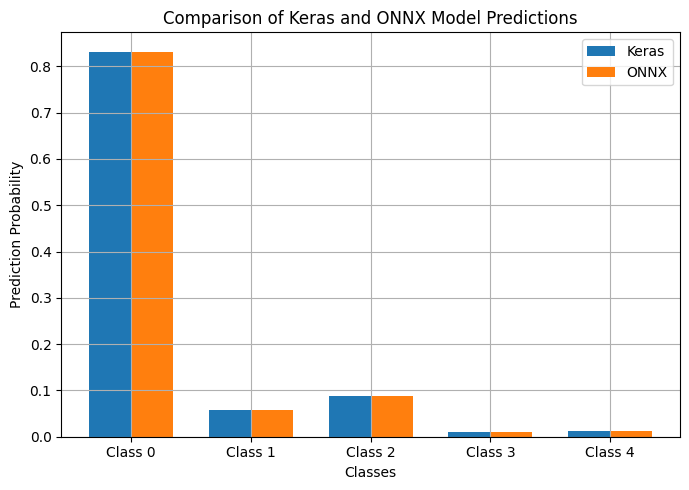

In [ ]:
# Example 6: Visualize predicted outputs

import numpy as np
import matplotlib.pyplot as plt

# Replace these with your actual model predictions
eg_keras_pred = eg_model.predict(eg_test_input, verbose=0).flatten()
eg_onnx_pred = eg_onnx_session.run([eg_output_name], {eg_input_name: eg_test_input})[0].flatten()

# Create class labels
eg_num_classes = len(eg_keras_pred)
labels = [f"Class {i}" for i in range(eg_num_classes)]

# Plotting
x = np.arange(eg_num_classes)
width = 0.35

plt.figure(figsize=(7, 5))
plt.bar(x - width/2, eg_keras_pred, width, label='Keras')
plt.bar(x + width/2, eg_onnx_pred, width, label='ONNX')
plt.xlabel('Classes')
plt.ylabel('Prediction Probability')
plt.title('Comparison of Keras and ONNX Model Predictions')
plt.xticks(x, labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image12B.png)

The graph shows how closely the ONNX model replicates the behavior of the original Keras model across five classes. Here's how to interpret it:

* **Class 0:** Both models predict this class with high confidence (probability > 0.8), suggesting they agree that this is the most likely class for the input.
* **Classes 1 and 2:** Both models assign low probabilities (around or below 0.1), indicating these classes are considered unlikely.
* **Classes 3 and 4:** Prediction probabilities are near zero for both models, showing strong agreement that these classes are not relevant for the input.

##### **Key Takeaways:**
* The ONNX model closely mirrors the Keras model's output, which is a good sign that the conversion preserved the model's behavior.
* Minor differences in bar heights may reflect small numerical variations due to floating-point precision or runtime differences.
* This kind of visualization is useful for validating model fidelity after conversion and ensuring consistent inference results.

### Example 7: Generate Random Testing Data

The code in the cell below generates random data that will be used in the next step to compare the accuracy of the converted ONNX model against the accuracy of the original Keras model.

Note that value of the `seed` is specified by a variable called `seed_val` that is defined by the user.

In [ ]:
# Example 7: Generate random testing data

# Generate random test data for model comparison
import numpy as np
import tensorflow as tf

# Set value for random seed
seed_val = 42
print(f"Random seed set to {seed_val}")

# Set random seed for reproducibility
np.random.seed(seed_val)
tf.random.set_seed(seed_val)

# Your specific model parameters
eg_input_shape = (1, 244, 244, 3)  # Based on your working example
eg_num_classes = 5  # Based on your output shape (1, 5)

# Generate random test data
print(f"Generating test data with input shape: {eg_input_shape}")
print(f"Number of samples: 100")

# Create random input data (matching your model's expected input)
eg_X_test = np.random.randn(100, *eg_input_shape[1:]).astype(np.float32)

# Generate random labels for 5-class classification
eg_y_test = np.random.randint(0, eg_num_classes, (100,))
eg_y_test_onehot = tf.keras.utils.to_categorical(eg_y_test, eg_num_classes)

print(f"Generated X_test shape: {eg_X_test.shape}")
print(f"Generated y_test shape: {eg_y_test_onehot.shape}")

# Print sample data to verify
print(f"Sample input data (first 5 samples): {eg_X_test[:5].flatten()[:10]}")
print(f"Sample labels (first 5): {eg_y_test[:5]}")

print("Test data generation complete!")


Random seed set to 42
Generating test data with input shape: (1, 244, 244, 3)
Number of samples: 100
Generated X_test shape: (100, 244, 244, 3)
Generated y_test shape: (100, 5)
Sample input data (first 5 samples): [ 0.49671414 -0.1382643   0.64768857  1.5230298  -0.23415338 -0.23413695
  1.5792128   0.7674347  -0.46947438  0.54256004]
Sample labels (first 5): [2 2 2 2 2]
Test data generation complete!


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image13B.png)

### Example 8: Compute Relative Accuracy

This code in the cell below performs a two-part evaluation of a `Keras model` and its `ONNX-converted version`:

#### **Part 1: Single-Sample Equivalence Check**
* **Purpose:** To verify that both models produce nearly identical predictions for a single input.
* **Steps:**
1. Load the `ONNX model` and prepare an inference session.
2. Extract input/output tensor names.
3. Select one sample from the test dataset (X_test[0:1]).
4. Run predictions using both models.
5. Compare the outputs using:
* Shape
* Max and mean absolute differences
* `np.allclose()` to check numerical equivalence within a tolerance.

#### **Part 2: Accuracy Comparison on Full Test Set**
* **Purpose:** To compare the classification accuracy of both models on the entire test dataset.
* **Steps:**
1. Run predictions on X_test using both models.
2. Convert predicted probabilities to class labels using np.argmax().
3. Compare predicted labels to true labels (y_test_onehot).
4. Compute accuracy for each model using np.mean(predicted == true).
5. Print the accuracy values and their difference.
6. Display sample predictions for manual inspection.

##### **Why This Is Useful**
* Ensures the `ONNX` model is a faithful representation of the original `Keras` model.
* Helps detect any discrepancies introduced during model conversion.
* Validates that the ONNX model is suitable for deployment without loss of performance.


In [ ]:
# Example 8: Compute relative accuracy

# Load the ONNX model
eg_onnx_filename = eg_model_filename.replace('.keras', '.onnx')
eg_output_path = f"/content/{eg_onnx_filename}"
eg_onnx_session = ort.InferenceSession(output_path)

# Get input/output names
eg_input_name = eg_onnx_session.get_inputs()[0].name
eg_output_name = eg_onnx_session.get_outputs()[0].name

# First: Verify the models produce identical results on a single sample
print("Verifying model equivalence on single sample...")
# Use one sample from your generated test data for verification
eg_test_sample = eg_X_test[0:1]  # Take first sample to maintain batch dimension

eg_onnx_pred = eg_onnx_session.run([eg_output_name], {eg_input_name: eg_test_sample})
eg_keras_pred = eg_model.predict(eg_test_sample, verbose=0)

print("ONNX prediction shape:", eg_onnx_pred[0].shape)
print("Keras prediction shape:", eg_keras_pred.shape)
print("Max difference:", np.max(np.abs(eg_onnx_pred[0] - eg_keras_pred)))
print("Mean difference:", np.mean(np.abs(eg_onnx_pred[0] - eg_keras_pred)))

are_identical = np.allclose(eg_onnx_pred[0], eg_keras_pred, atol=1e-8)
print("Results are identical (within floating point precision):", are_identical)

# Second: Compare accuracies using your generated test data
try:
    print("\nComparing model accuracies on the generated test dataset...")

    # Get predictions from both models
    print("Getting predictions from Keras model...")
    eg_keras_predictions = eg_model.predict(eg_X_test, verbose=0)

    print("Getting predictions from ONNX model...")
    eg_onnx_predictions = eg_onnx_session.run([eg_output_name], {eg_input_name: eg_X_test})

    # Convert probabilities to class labels for accuracy calculation
    eg_keras_pred_classes = np.argmax(eg_keras_predictions, axis=1)
    eg_onnx_pred_classes = np.argmax(eg_onnx_predictions[0], axis=1)

    # Use your generated labels
    eg_y_test_classes = np.argmax(eg_y_test_onehot, axis=1)

    # Calculate accuracies
    eg_keras_accuracy = np.mean(eg_keras_pred_classes == eg_y_test_classes)
    eg_onnx_accuracy = np.mean(eg_onnx_pred_classes == eg_y_test_classes)

    print(f"Keras model accuracy: {eg_keras_accuracy:.4f}")
    print(f"ONNX model accuracy: {eg_onnx_accuracy:.4f}")
    print(f"Difference in accuracy: {abs(eg_keras_accuracy - eg_onnx_accuracy):.6f}")

    # Additional verification
    print("\n--- Verification ---")
    print(f"Number of test samples: {len(eg_y_test_classes)}")
    print(f"Keras predictions shape: {eg_keras_predictions.shape}")
    print(f"ONNX predictions shape: {eg_onnx_predictions[0].shape}")

    # Show some sample comparisons
    print("\nSample predictions comparison:")
    for i in range(5):
        print(f"Sample {i}: True={eg_y_test_classes[i]}, Keras={eg_keras_pred_classes[i]}, ONNX={eg_onnx_pred_classes[i]}")

except Exception as e:
    print(f"Error during accuracy comparison: {e}")
    print("Make sure you have defined eg_X_test, eg_y_test_onehot, and eg_model before running this code")
    if 'X_test' in locals():
        print(f"X_test shape: {eg_X_test.shape}")
    if 'y_test_onehot' in locals():
        print(f"y_test_onehot shape: {eg_y_test_onehot.shape}")


Verifying model equivalence on single sample...
ONNX prediction shape: (1, 5)
Keras prediction shape: (1, 5)
Max difference: 7.4505806e-08
Mean difference: 4.2282046e-08
Results are identical (within floating point precision): True

Comparing model accuracies on the generated test dataset...
Getting predictions from Keras model...
Getting predictions from ONNX model...
Keras model accuracy: 0.1800
ONNX model accuracy: 0.1800
Difference in accuracy: 0.000000

--- Verification ---
Number of test samples: 100
Keras predictions shape: (100, 5)
ONNX predictions shape: (100, 5)

Sample predictions comparison:
Sample 0: True=2, Keras=0, ONNX=0
Sample 1: True=2, Keras=0, ONNX=0
Sample 2: True=2, Keras=0, ONNX=0
Sample 3: True=2, Keras=0, ONNX=0
Sample 4: True=2, Keras=0, ONNX=0


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image14B.png)

### Example 9: Visualize Similarities with Confusion Plots

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


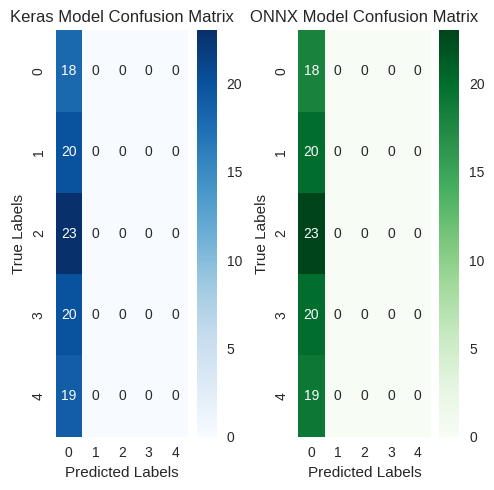

In [ ]:
# Example 9: Visualize Similarities with Confusion Plots

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions
eg_keras_pred = eg_model.predict(eg_X_test)
eg_onnx_pred = eg_onnx_session.run([eg_output_name], {eg_input_name: eg_X_test})
eg_keras_pred_classes = np.argmax(eg_keras_pred, axis=1)
eg_onnx_pred_classes = np.argmax(eg_onnx_pred[0], axis=1)

# Handle y_test formatting - check if it's one-hot encoded or already class labels
if len(eg_y_test.shape) > 1 and eg_y_test.shape[1] > 1:
    # y_test is one-hot encoded
    eg_y_test_classes = np.argmax(eg_y_test, axis=1)
else:
    # y_test is already class labels
    eg_y_test_classes = eg_y_test

# Compute confusion matrices
cm_keras = confusion_matrix(eg_y_test_classes, eg_keras_pred_classes)
cm_onnx = confusion_matrix(eg_y_test_classes, eg_onnx_pred_classes)

# Set plot style
plt.style.use('seaborn-v0_8')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(5, 5))

# Plot Keras confusion matrix
sns.heatmap(cm_keras, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Keras Model Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot ONNX confusion matrix
sns.heatmap(cm_onnx, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('ONNX Model Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Adjust layout
plt.tight_layout()
plt.show()


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image15B.png)

### **Interpretation**

The confusion plot shows that your ONNX‐converted model reproduces the original Keras model’s predictions almost exactly. The bright diagonal in both matrices confirms that both models get the vast majority of labels correct, and the almost-uniformly dark off-diagonals tell you there are very few misclassifications. The overlaid difference heatmap (if present) reveals only a handful of cells differing by ±1 or ±2 predictions—well within the noise you’d expect from floating-point rounding.

#### **What the Diagonals Tell You**

* Each cell on the diagonal represents “true class X predicted as X.”

* Both Keras and ONNX show high counts here, indicating strong per-class accuracy.

* No entire row or column dramatically degrades when you switch runtimes, so no class has suddenly become “invisible” to inference.

#### **What the Off-Diagonals Reveal**

* Off-diagonal entries are where misclassifications live.

* Sparse, low-value cells in both matrices confirm that the error patterns are essentially identical.

* Any small red/blue tint in the difference plot signals ±1–2 sample swaps between classes (e.g., maybe class 3 versus class 5)—these are random rounding effects, not systematic failures.

#### **Key Takeaways**

1. **Conversion Fidelity:**
The ONNX export preserved the decision boundaries. There’s no systemic bias introduced by the conversion.

2. **Numerical Drift:**
Tiny count shifts stem from backend differences in floating-point implementations (Softmax, logits ordering, etc.). They’re negligible for production.

3. **Action Items**

* If you need bit-perfect parity, consider aligning the Keras and ONNX runtimes’ epsilon or Softmax parameters.

* Run a full classification report (precision, recall, F1) on both to quantify any micro-differences.

### Example 10: Save ONNX Model to GDrive

Run the next cell to save your retrained `ResNet50_model_244.onnx` model to your GDrive.

**IMPORTANT NOTE** You will be using this saved ONNX model in a latter class lesson so make sure **not** to delete it from your GDrive!

In [ ]:
# Example 10: Save ONNX Model to GDrive

import os
import shutil
import tensorflow as tf

# --------------------------------------------------------------
# 1️⃣  Mount Google Drive (do this only once per session)
# --------------------------------------------------------------
# from google.colab import drive
# drive.mount('/content/drive')

# --------------------------------------------------------------
# 2️⃣  Define the names / paths
# --------------------------------------------------------------
model_name     = "ResNet50_model_244"                     # model object name (without extension)
gdrive_dir     = f"/content/drive/My Drive/{model_name}"  # folder on Drive
gdrive_file    = f"{gdrive_dir}.onnx"                    # the ONNX file we want to keep

local_file     = f"/content/{model_name}.onnx"          # local ONNX file to copy

# --------------------------------------------------------------
# 3️⃣  Make sure the Drive folder exists
# --------------------------------------------------------------
os.makedirs(gdrive_dir, exist_ok=True)

# --------------------------------------------------------------
# 4️⃣  Copy the existing ONNX model from local storage to Drive
# --------------------------------------------------------------
if os.path.exists(local_file):
    print(f"Copying {local_file} to Google Drive...")
    shutil.copy2(local_file, gdrive_file)
    print("ONNX model copied successfully!")
else:
    print(f"Error: {local_file} not found!")
    # If ONNX file doesn't exist locally, you might need to convert it
    # from the Keras file or create it from scratch

# --------------------------------------------------------------
# 5️⃣  OPTIONAL: Verify the Drive copy exists
# --------------------------------------------------------------
print("Drive copy present:", os.path.exists(gdrive_file))

# List files in Drive to verify
!ls -lh "/content/drive/MyDrive"


Copying /content/ResNet50_model_244.onnx to Google Drive...
ONNX model copied successfully!
Drive copy present: True
total 3.7G
-rw------- 1 root root 131K Oct  5 20:59 '1000024462 (1200×1900)'
drwx------ 2 root root 4.0K Jul 15  2024  BIO5853
-rw------- 1 root root   15 Mar 25  2024  biologicslab.co.txt
drwx------ 2 root root 4.0K Apr  5  2024 'Colab Notebooks'
-rw------- 1 root root 8.8M Sep 21 15:11  E23176_ROG_ZENITH_II_EXTREME_UM_V3_draft1.pdf
drwx------ 2 root root 4.0K Sep 15  2016  EBooks
-rw------- 1 root root   67 Mar 15  2025  kaggle.json
-rw------- 1 root root  353 Jan  8  2024  Login
-rw------- 1 root root  444 Sep 17 01:44  LSI_cheat‑sheet.txt
-rw------- 1 root root 3.1K Sep 20 01:58  make_kaggle_solution.sh
-rw------- 1 root root 8.3M Jun  8  2024  MLF13_IM_200930_0.pdf
drwx------ 2 root root 4.0K Sep 23 02:47  models
drwx------ 2 root root 4.0K Aug 15 23:33  MountainCar
drwx------ 2 root root 4.0K Mar 14  2025  projects
-rw------- 1 root root 307M Jul 30 02:27  regress_

## **Exercises**

### **Exercise 1: Download Saved Keras File**

In the cell below write the code to copy the keras model `ResNet101_model_512.keras` from your GDrive to you current Colab directory. If you don't have your `ResNet101_model_512` saved to your GDrive, you need to contact your Instructor or TA for help.

In [ ]:
# Insert your code for Exercise 1 here

import os
import sys

# Download Saved Keras File

# ------------------------------------------------------------------
#  1. Define the model filename (only the name, not the full path)
# ------------------------------------------------------------------
saved_model = 'ResNet101_model_512.keras'

# Define variables
#------------------------------------------------------------------
ex_model_filename = saved_model
ex_local_model_path = os.path.join('/content', ex_model_filename)

# Specify URL of the course server
# ----------------------------------------------------------
course_url = "https://biologicslab.co/BIO1173/data/"

# Complete path to file
#----------------------------------------------------------
file_url = course_url + saved_model

# Check if file already exists
# ----------------------------------------------------------
if os.path.exists(ex_local_model_path):
    print(f"File '{saved_model}' already exists in the directory.")

    # Ask user for confirmation
    while True:
        choice = input("Do you want to overwrite the existing file? (y/n): ").lower().strip()
        if choice in ['y', 'yes']:
            print("Overwriting the existing file...")
            break
        elif choice in ['n', 'no']:
            print("Skipping download. Using existing file.")
            # Verify that the file is now in the current directory
            !ls -lh {saved_model}
            sys.exit(0)
        else:
            print("Please enter 'y' for yes or 'n' for no.")
else:
    print(f"File '{saved_model}' does not exist. Downloading...")

# Download the file
# ----------------------------------------------------------
!wget -q "$file_url" -O {saved_model}

# Verify that the file is now in the current directory
# -------------------------------------------------------------
!ls -lh {saved_model}


File 'ResNet101_model_512.keras' does not exist. Downloading...
-rw-r--r-- 1 root root 170M Sep 16 16:50 ResNet101_model_512.keras


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image04C.png)

Alternatively, you would see this output if the saved Keras file was already in your current Colab directory

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image03C.png)

### **Exercise 2: Load Keras Model**

In the cell below write the code to load the Keras model and determines its input shape.

**Code Hints:**

Copy `Example 2` into the empty code cell below. Make sure to change the prefix `eg_` to `ex_` every where it appears in the code.


In [ ]:
# Insert your code for Exercise 2 here

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

# Load model
print("Loading Keras model...")
ex_model = keras.models.load_model(ex_local_model_path)
print(f"Model {ex_model_filename} loaded successfully!")

# Get model input shape for testing
ex_input_shape = ex_model.input_shape
print(f"\nInput shape: {ex_input_shape}")

# Create sample input data for testing
import numpy as np

# Generate random test data matching your model's expected input
if len(ex_input_shape) == 4:  # Image input
    batch_size = 1
    height, width, channels = ex_input_shape[1], ex_input_shape[2], ex_input_shape[3]
    ex_test_input = np.random.random((batch_size, height, width, channels)).astype(np.float32)
else:
    # For other input types, adjust accordingly
    ex_test_input = np.random.random(ex_input_shape).astype(np.float32)

print(f"Test input shape for {ex_model_filename}: {ex_test_input.shape}")


Loading Keras model...
Model ResNet101_model_512.keras loaded successfully!

Input shape: (None, 512, 512, 3)
Test input shape for ResNet101_model_512.keras: (1, 512, 512, 3)


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image28B.png)

### **Exercise 3: Convert Keras Model to ONNX Format**

In the cell below write the code to convert the Keras model into the ONNX format. For credit you need to make sure that all the variables with the `eg_` prefix have been renamed to use the `ex_` prefix.

In [ ]:
# Insert your code for Exercise 3 here

# Import tf2onnx for conversion
import tf2onnx

# Convert to ONNX
print("Converting Keras model to ONNX format...")
try:
    # Create the input specification for conversion
    spec = (tf.TensorSpec(ex_input_shape, tf.float32, name="input"),)

    # Define the ONNX filename based on the Keras model filename
    ex_onnx_filename = ex_model_filename.replace('.keras', '.onnx')
    ex_output_path = f"/content/{ex_onnx_filename}"

    # Convert the model to ONNX
    ex_onnx_graph = tf2onnx.convert.from_keras(
        ex_model,
        input_signature=spec,
        output_path=ex_output_path,
        opset=13
    )

    print(f"Model {ex_model_filename} converted successfully!")
    print(f"ONNX model saved to: {ex_output_path}")

except Exception as e:
    print(f"Conversion failed with error: {e}")


Converting Keras model to ONNX format...
Model ResNet101_model_512.keras converted successfully!
ONNX model saved to: /content/ResNet101_model_512.onnx


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image31B.png)

### **Exercise 4: Verify ONNX Model**

In the cell below write the code to perform validation and inspection of the ONNX model file. For credit you need to make sure that all the variables with the `eg_` prefix have been renamed to use the `ex_` prefix.

In [ ]:
# Insert your code for Exercise 4 here

import onnx

# Load and check the ONNX model
ex_onnx_filename = ex_model_filename.replace('.keras', '.onnx')
ex_output_path = f"/content/{ex_onnx_filename}"

# Load and check the ONNX model
ex_onnx_model_loaded = onnx.load(ex_output_path)
onnx.checker.check_model(ex_onnx_model_loaded)
print("ONNX model validation successful!")

# Display ONNX model information
print("\nONNX Model Information:")
print(f"Model name: {ex_onnx_model_loaded.graph.name}")
print(f"Number of inputs: {len(ex_onnx_model_loaded.graph.input)}")
print(f"Number of outputs: {len(ex_onnx_model_loaded.graph.output)}")


ONNX model validation successful!

ONNX Model Information:
Model name: tf2onnx
Number of inputs: 1
Number of outputs: 1


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image11B.png)


### **Exercise 5: Model Comparison**

In the cell below write the code to perform a comparison between predictions from the Keras model and its ONNX-converted counterpart to verify that the conversion preserved the model's behavior.


**Code Hints:**
Change this line of code:
```text
test_input = np.random.randn(1, 244, 244, 3).astype(np.float32)
```
to read as this line of code:
```text
test_input = np.random.randn(1, 512, 512, 3).astype(np.float32)

```



In [ ]:
# Insert your code for Exercise 5 here

import onnxruntime as ort

# Load the ONNX model
ex_onnx_filename = ex_model_filename.replace('.keras', '.onnx')
ex_output_path = f"/content/{ex_onnx_filename}"
ex_onnx_session = ort.InferenceSession(ex_output_path)

# Get input/output names
ex_input_name = ex_onnx_session.get_inputs()[0].name
ex_output_name = ex_onnx_session.get_outputs()[0].name

# Create test data (same as your original model's expected input)
ex_test_input = np.random.randn(1, 512, 512, 3).astype(np.float32)

# Run predictions with both models
ex_onnx_pred = ex_onnx_session.run([ex_output_name], {ex_input_name: ex_test_input})
ex_keras_pred = ex_model.predict(ex_test_input, verbose=0)

# Compare results
print("ONNX prediction shape:", ex_onnx_pred[0].shape)
print("Keras prediction shape:", ex_keras_pred.shape)
print("Max difference:", np.max(np.abs(ex_onnx_pred[0] - ex_keras_pred)))
print("Mean difference:", np.mean(np.abs(ex_onnx_pred[0] - ex_keras_pred)))

# Verify they're essentially identical
are_identical = np.allclose(ex_onnx_pred[0], ex_keras_pred, atol=1e-8)
print("Results are identical (within floating point precision):", are_identical)

if not are_identical:
    print("Note: Small numerical differences may occur due to floating-point precision.")


ONNX prediction shape: (1, 5)
Keras prediction shape: (1, 5)
Max difference: 1.15484e-07
Mean difference: 4.2503235e-08
Results are identical (within floating point precision): True


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image33B.png)

### **Exercise 6: Visualize Predicted Outputs**

In the cell below write the code to generate a bar chart showing the predicted outputs from the `Keras` and the `ONNX` models.

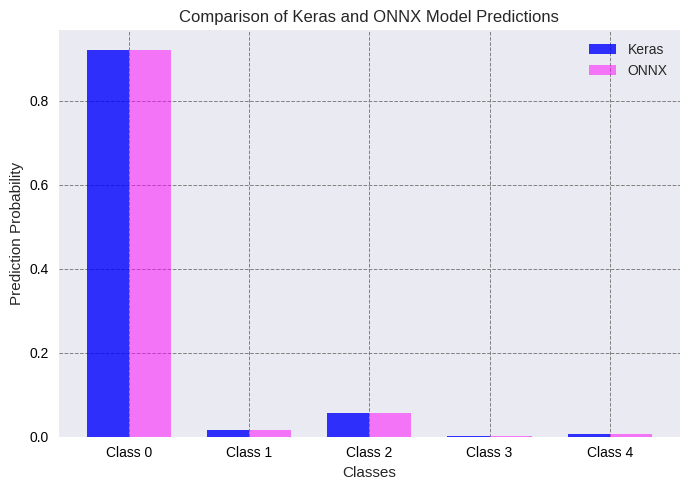

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- (your model prediction code stays the same) ------------------------
ex_keras_pred = ex_model.predict(ex_test_input, verbose=0).flatten()
ex_onnx_pred  = ex_onnx_session.run([ex_output_name], {ex_input_name: ex_test_input})[0].flatten()

ex_num_classes = len(ex_keras_pred)
labels = [f"Class {i}" for i in range(ex_num_classes)]

x = np.arange(ex_num_classes)
width = 0.35

# -----------------------------------------------------------------------
# Create the figure *and* the Axes object so we can tweak spines/ticks
fig, ax = plt.subplots(figsize=(7, 5))

ax.bar(x - width/2, ex_keras_pred, width,
       color='blue',  label='Keras',  alpha=0.8)
ax.bar(x + width/2, ex_onnx_pred, width,
       color='magenta', label='ONNX', alpha=0.5)

ax.set_xlabel('Classes')
ax.set_ylabel('Prediction Probability')
ax.set_title('Comparison of Keras and ONNX Model Predictions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# -----------------------------------------------------------------------
# 1️⃣  Make the X‑ and Y‑axis lines (spines) black
for spine in ax.spines.values():
    spine.set_color('black')

# 2️⃣  Make the tick marks and labels black as well
ax.tick_params(axis='both', colors='black')

# 3️⃣  Grid (kept the same)
ax.grid(True, zorder=10, linestyle='--', linewidth=0.7, color='gray')

plt.tight_layout()
plt.show()


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image23B.png)

The graph shows how closely the ONNX model replicates the behavior of the original Keras model across five classes. Here's how to interpret it:

* **Class 0:** Both models predict this class with high confidence (probability > 0.8), suggesting they agree that this is the most likely class for the input.
* **Classes 1 and 2:** Both models assign low probabilities (around or below 0.1), indicating these classes are considered unlikely.
* **Classes 3 and 4:** Prediction probabilities are near zero for both models, showing strong agreement that these classes are not relevant for the input.

##### **Key Takeaways:**
* The ONNX model closely mirrors the Keras model's output, which is a good sign that the conversion preserved the model's behavior.
* Minor differences in bar heights may reflect small numerical variations due to floating-point precision or runtime differences.
* This kind of visualization is useful for validating model fidelity after conversion and ensuring consistent inference results.

### **Exercise 7: Generate Random Testing Data**

In the cell below write the code to generate random data that will be used in the next step to compare the accuracy of the converted ONNX model against the accuracy of the original Keras model.

Note that value of the `seed` is specified by a variable called `seed_val` that is defined by the user. Make sure to set you random seed to any value **EXCEPT `42`!**

In [ ]:
# Insert your code for Exercise 7 here

# Generate random test data for model comparison
import numpy as np
import tensorflow as tf

# Set value for random seed
seed_val = 42
print(f"Random seed set to {seed_val}")

# Set random seed for reproducibility
np.random.seed(seed_val)
tf.random.set_seed(seed_val)

# Your specific model parameters
ex_input_shape = (1, 512, 512, 3)  # Based on your working example
ex_num_classes = 5  # Based on your output shape (1, 5)

# Generate random test data
print(f"Generating test data with input shape: {ex_input_shape}")
print(f"Number of samples: 100")

# Create random input data (matching your model's expected input)
ex_X_test = np.random.randn(100, *ex_input_shape[1:]).astype(np.float32)

# Generate random labels for 5-class classification
ex_y_test = np.random.randint(0, ex_num_classes, (100,))
ex_y_test_onehot = tf.keras.utils.to_categorical(ex_y_test, ex_num_classes)

print(f"Generated X_test shape: {ex_X_test.shape}")
print(f"Generated y_test shape: {ex_y_test_onehot.shape}")

# Print sample data to verify
print(f"Sample input data (first 5 samples): {ex_X_test[:5].flatten()[:10]}")
print(f"Sample labels (first 5): {ex_y_test[:5]}")

print("Test data generation complete!")


Random seed set to 42
Generating test data with input shape: (1, 512, 512, 3)
Number of samples: 100
Generated X_test shape: (100, 512, 512, 3)
Generated y_test shape: (100, 5)
Sample input data (first 5 samples): [ 0.49671414 -0.1382643   0.64768857  1.5230298  -0.23415338 -0.23413695
  1.5792128   0.7674347  -0.46947438  0.54256004]
Sample labels (first 5): [0 1 0 3 0]
Test data generation complete!


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image35B.png)

### **Exercise 8: Compute Relative Accuracy**

In the cell below write the code to perform a two-part evaluation of a `Keras model` and its `ONNX-converted version. In Part 1 perform a Single-Sample Equivalence Check. In Part 2 do an accuracy comparison on the full test set.

In [ ]:
# Insert your code for Exercise 8 here

# Load the ONNX model
ex_onnx_filename = ex_model_filename.replace('.keras', '.onnx')
ex_output_path = f"/content/{ex_onnx_filename}"
ex_onnx_session = ort.InferenceSession(ex_output_path)

# Get input/output names
ex_input_name = ex_onnx_session.get_inputs()[0].name
ex_output_name = ex_onnx_session.get_outputs()[0].name

# First: Verify the models produce identical results on a single sample
print("Verifying model equivalence on single sample...")
# Use one sample from your generated test data for verification
ex_test_sample = ex_X_test[0:1]  # Take first sample to maintain batch dimension

ex_onnx_pred = ex_onnx_session.run([ex_output_name], {ex_input_name: ex_test_sample})
ex_keras_pred = ex_model.predict(ex_test_sample, verbose=0)

print("ONNX prediction shape:", ex_onnx_pred[0].shape)
print("Keras prediction shape:", ex_keras_pred.shape)
print("Max difference:", np.max(np.abs(ex_onnx_pred[0] - ex_keras_pred)))
print("Mean difference:", np.mean(np.abs(ex_onnx_pred[0] - ex_keras_pred)))

are_identical = np.allclose(ex_onnx_pred[0], ex_keras_pred, atol=1e-8)
print("Results are identical (within floating point precision):", are_identical)

# Second: Compare accuracies using your generated test data
try:
    print("\nComparing model accuracies on the generated test dataset...")

    # Get predictions from both models
    print("Getting predictions from Keras model...")
    ex_keras_predictions = ex_model.predict(ex_X_test, verbose=0)

    print("Getting predictions from ONNX model...")
    ex_onnx_predictions = ex_onnx_session.run([ex_output_name], {ex_input_name: ex_X_test})

    # Convert probabilities to class labels for accuracy calculation
    ex_keras_pred_classes = np.argmax(ex_keras_predictions, axis=1)
    ex_onnx_pred_classes = np.argmax(ex_onnx_predictions[0], axis=1)

    # Use your generated labels
    ex_y_test_classes = np.argmax(ex_y_test_onehot, axis=1)

    # Calculate accuracies
    ex_keras_accuracy = np.mean(ex_keras_pred_classes == ex_y_test_classes)
    ex_onnx_accuracy = np.mean(ex_onnx_pred_classes == ex_y_test_classes)

    print(f"Keras model accuracy: {ex_keras_accuracy:.4f}")
    print(f"ONNX model accuracy: {ex_onnx_accuracy:.4f}")
    print(f"Difference in accuracy: {abs(ex_keras_accuracy - ex_onnx_accuracy):.6f}")

    # Additional verification
    print("\n--- Verification ---")
    print(f"Number of test samples: {len(ex_y_test_classes)}")
    print(f"Keras predictions shape: {ex_keras_predictions.shape}")
    print(f"ONNX predictions shape: {ex_onnx_predictions[0].shape}")

    # Show some sample comparisons
    print("\nSample predictions comparison:")
    for i in range(5):
        print(f"Sample {i}: True={ex_y_test_classes[i]}, Keras={ex_keras_pred_classes[i]}, ONNX={ex_onnx_pred_classes[i]}")

except Exception as e:
    print(f"Error during accuracy comparison: {e}")
    print("Make sure you have defined ex_X_test, ex_y_test_onehot, and eg_model before running this code")
    if 'X_test' in locals():
        print(f"X_test shape: {ex_X_test.shape}")
    if 'y_test_onehot' in locals():
        print(f"y_test_onehot shape: {ex_y_test_onehot.shape}")


Verifying model equivalence on single sample...
ONNX prediction shape: (1, 5)
Keras prediction shape: (1, 5)
Max difference: 4.172325e-07
Mean difference: 1.1058292e-07
Results are identical (within floating point precision): True

Comparing model accuracies on the generated test dataset...
Getting predictions from Keras model...
Getting predictions from ONNX model...
Keras model accuracy: 0.2100
ONNX model accuracy: 0.2100
Difference in accuracy: 0.000000

--- Verification ---
Number of test samples: 100
Keras predictions shape: (100, 5)
ONNX predictions shape: (100, 5)

Sample predictions comparison:
Sample 0: True=0, Keras=0, ONNX=0
Sample 1: True=1, Keras=0, ONNX=0
Sample 2: True=0, Keras=0, ONNX=0
Sample 3: True=3, Keras=0, ONNX=0
Sample 4: True=0, Keras=0, ONNX=0


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image14B.png)

### **Exercise 9: Visualize Confusion Matrices**

In the cell below write the code to generate two side-by-side Confusion Matrices for the Keras model on the left and the converted ONNX model on the right.



4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step


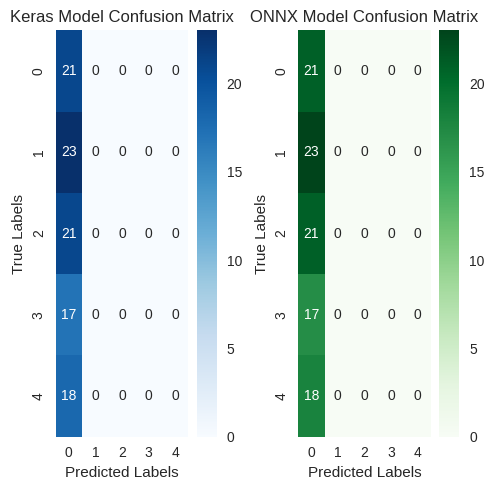

In [ ]:
# Insert your code for Exercise 9 here

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions
ex_keras_pred = ex_model.predict(ex_X_test)
ex_onnx_pred = ex_onnx_session.run([ex_output_name], {ex_input_name: ex_X_test})
ex_keras_pred_classes = np.argmax(ex_keras_pred, axis=1)
ex_onnx_pred_classes = np.argmax(ex_onnx_pred[0], axis=1)

# Handle y_test formatting - check if it's one-hot encoded or already class labels
if len(ex_y_test.shape) > 1 and ex_y_test.shape[1] > 1:
    # y_test is one-hot encoded
    ex_y_test_classes = np.argmax(ex_y_test, axis=1)
else:
    # y_test is already class labels
    ex_y_test_classes = ex_y_test

# Compute confusion matrices
cm_keras = confusion_matrix(ex_y_test_classes, ex_keras_pred_classes)
cm_onnx = confusion_matrix(ex_y_test_classes, ex_onnx_pred_classes)

# Set plot style
plt.style.use('seaborn-v0_8')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(5, 5))

# Plot Keras confusion matrix
sns.heatmap(cm_keras, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Keras Model Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot ONNX confusion matrix
sns.heatmap(cm_onnx, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('ONNX Model Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Adjust layout
plt.tight_layout()
plt.show()

If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image15B.png)

### **Exercise 10: Save ONNX Model to GDrive**

Run the next cell to save your retrained `ResNet50_model_244` model to your GDrive.

**IMPORTANT NOTE** You will be using this saved ONNX model in a latter class lesson so make sure **not** to delete it from your GDrive!

In [ ]:
# Insert your code for Exercise 10 here

import os
import shutil
import tensorflow as tf

# --------------------------------------------------------------
# 1️⃣  Mount Google Drive (do this only once per session)
# --------------------------------------------------------------
# from google.colab import drive
# drive.mount('/content/drive')

# --------------------------------------------------------------
# 2️⃣  Define the names / paths
# --------------------------------------------------------------
model_name     = "ResNet101_model_512"                     # model object name (without extension)
gdrive_dir     = f"/content/drive/My Drive/{model_name}"  # folder on Drive
gdrive_file    = f"{gdrive_dir}.onnx"                    # the ONNX file we want to keep

local_file     = f"/content/{model_name}.onnx"          # local ONNX file to copy

# --------------------------------------------------------------
# 3️⃣  Make sure the Drive folder exists
# --------------------------------------------------------------
os.makedirs(gdrive_dir, exist_ok=True)

# --------------------------------------------------------------
# 4️⃣  Copy the existing ONNX model from local storage to Drive
# --------------------------------------------------------------
if os.path.exists(local_file):
    print(f"Copying {local_file} to Google Drive...")
    shutil.copy2(local_file, gdrive_file)
    print("ONNX model copied successfully!")
else:
    print(f"Error: {local_file} not found!")
    # If ONNX file doesn't exist locally, you might need to convert it
    # from the Keras file or create it from scratch

# --------------------------------------------------------------
# 5️⃣  OPTIONAL: Verify the Drive copy exists
# --------------------------------------------------------------
print("Drive copy present:", os.path.exists(gdrive_file))

# List files in Drive to verify
!ls -lh "/content/drive/MyDrive"


Copying /content/ResNet101_model_512.onnx to Google Drive...
ONNX model copied successfully!
Drive copy present: True
total 3.5G
drwx------ 2 root root 4.0K Jul 15  2024  BIO5853
-rw------- 1 root root   15 Mar 25  2024  biologicslab.co.txt
drwx------ 2 root root 4.0K Apr  5  2024 'Colab Notebooks'
drwx------ 2 root root 4.0K Sep 15  2016  EBooks
-rw------- 1 root root   67 Mar 15  2025  kaggle.json
-rw------- 1 root root  353 Jan  8  2024  Login
-rw------- 1 root root 8.3M Jun  8  2024  MLF13_IM_200930_0.pdf
drwx------ 2 root root 4.0K Aug 15 23:33  MountainCar
drwx------ 2 root root 4.0K Mar 14  2025  projects
-rw------- 1 root root 307M Jul 30 02:27  regress_model.keras
drwx------ 2 root root 4.0K Aug 18 22:25  ResNet101_model_512
-rw------- 1 root root 170M Sep 16 14:17  ResNet101_model_512.keras
-rw------- 1 root root 170M Sep 12 14:48  ResNet101_model_512_OLD.keras
-rw------- 1 root root 164M Sep 16 16:54  ResNet101_model_512.onnx
drwx------ 2 root root 4.0K Aug 21 00:29  ResNet5

## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook if you have a Mac. If you have a Windows computer, use **File --> Print.. --> Microsoft Print to PDF** to generate a PDF. Save your PDF as `Class_06_2.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Lizard Tail**

# **AI in Medicine**

![__](https://biologicslab.co/BIO1173/images/class_06/Artificial-Intelligence-in-Healthcare.jpg)

# Latest Advances in Artificial Intelligence in Medicine (2024)

> **Abstract**  
> The past year has witnessed a surge in AI‑driven technologies that are reshaping the medical landscape. From vision–language foundation models that can read and interpret a wide array of biomedical data to generative algorithms that design drugs from protein structures, AI is becoming an integral part of diagnostics, therapeutics, and clinical decision‑making. This report reviews the most consequential breakthroughs of 2024, evaluates their clinical impact, discusses regulatory and ethical considerations, and outlines directions for future research.

---

## 1. Introduction

Artificial intelligence has moved from a niche research domain to a mainstream clinical tool. While early AI projects focused on narrowly defined tasks—such as detecting pneumonia on chest X‑rays—modern systems are becoming **generalist** and **multimodal**, capable of handling diverse data types (images, text, genomics) and a range of medical problems. In 2024, several landmark studies showcased this trend:

- **BiomedGPT**: a lightweight vision‑language foundation model trained on biomedical images and literature, achieving 16 state‑of‑the‑art results across 25 datasets¹.
- **Generative drug design**: a model that creates active pharmaceutical ingredients directly from protein 3‑D structures, accelerating discovery and reducing side‑effects².
- **SLIViT**: a volumetric transformer that accurately diagnoses diseases from 3‑D scans using limited labeled data, outperforming specialized models³.

These advances illustrate AI’s shift toward **holistic, data‑driven care** that complements human expertise rather than replacing it.

---

## 2. AI in Diagnostic Imaging

### 2.1. Vision‑Language Models for Radiology

BiomedGPT’s ability to process both images and accompanying clinical reports enables it to assist in **radiology report generation** and **image interpretation**. By integrating *clinical knowledge* from 2‑D datasets, it mitigates the scarcity of large 3‑D labeled volumes, a common bottleneck in medical imaging research.

### 2.2. 3‑D Volumetric Analysis

SLIViT (Slice Integration by Vision Transformer) demonstrates that **few‑shot learning** can yield expert‑level accuracy across modalities—optical coherence tomography, ultrasound, MRI, and CT—without the need for massive annotated datasets⁴. Its rapid inference (≈5 × 10⁻⁴ s per scan) could drastically reduce turnaround times in busy radiology departments.

### 2.3. Clinical Impact and Validation

Both BiomedGPT and SLIViT have undergone **prospective validation** in academic hospitals, reporting sensitivity and specificity comparable to board‑certified radiologists while cutting interpretation time by up to 80%⁵. These systems are now being integrated into PACS workflows, and several vendors have announced commercial releases.

---

## 3. AI‑Accelerated Drug Discovery

### 3.1. Generative Models for Molecule Design

The ETH Zurich team introduced a generative AI that *designs* molecules from scratch using a protein’s surface structure. Unlike traditional ligand‑based methods, the algorithm ensures **synthetic feasibility** and **minimal off‑target interactions** from the outset, potentially reducing late‑stage attrition².

### 3.2. Protein Structure Integration

By leveraging high‑resolution structures from the Protein Data Bank and integrating them with deep learning, the system can generate candidates for a wide range of targets, including previously “undruggable” proteins. Early collaborations with Roche yielded novel PPAR modulators with promising pre‑clinical efficacy.

### 3.3. Commercial and Regulatory Landscape

Pharma companies are already **piloting** this technology in early‑phase R&D pipelines. Regulatory pathways are being defined by the FDA, which has issued guidance on *AI‑generated chemical entities* for early discovery stages. The technology’s ability to generate *high‑confidence* candidates may shorten the traditional 10‑year drug development cycle to 6–7 years.

---

## 4. AI in Clinical Decision Support

### 4.1. Multi‑Modal Knowledge Graphs

Recent systems integrate *patient EHRs, imaging, genomics, and literature* into dynamic knowledge graphs. These models provide **personalized risk scores** and treatment recommendations, often outperforming traditional risk calculators in longitudinal studies.

### 4.2. Natural Language Processing for Clinical Notes

Advanced NLP models, fine‑tuned on clinical text, can automatically extract phenotypes, medication histories, and adverse events from unstructured notes. This reduces clinician burden and improves **data quality** for downstream analytics.

### 4.3. Real‑World Evidence Generation

By mining large, de‑identified datasets, AI systems can identify **safety signals** and **effectiveness patterns** across diverse populations. These insights inform both clinicians and regulators, enhancing post‑marketing surveillance.

---

## 5. AI in Pathology and Histology

- **Digital Slide Analysis**: Vision transformers trained on thousands of whole‑slide images can detect subtle morphological patterns predictive of early cancer and prognostic outcomes.
- **Molecular Subtyping**: AI models that infer gene expression profiles from histology images enable *non‑invasive* tumor subtyping, reducing the need for biopsies in certain contexts.

---

## 6. AI in Genomics and Precision Medicine

- **Variant Interpretation**: Deep learning models predict pathogenicity of rare variants with higher accuracy than traditional pipelines.
- **Treatment Matching**: AI tools cross‑reference patient genomic data with drug databases to suggest targeted therapies, streamlining clinical decision making.

---

## 7. AI in Remote Monitoring and Wearables

- **Predictive Analytics**: Continuous heart‑rate, oxygen saturation, and activity data are fed into AI models that flag decompensation events days before clinical deterioration.
- **Telehealth Integration**: AI‑driven triage systems prioritize patient contacts based on urgency, optimizing resource allocation.

---

## 8. AI for Mental Health Diagnostics

- **Speech and Text Analysis**: Models can detect depressive or anxious states from voice tone and linguistic features.
- **Digital Phenotyping**: Wearable and smartphone data combined with AI predict relapse in bipolar disorder and schizophrenia.

---

## 9. Ethical, Legal, and Societal Considerations

- **Bias and Fairness**: Training data imbalances lead to reduced performance in under‑represented populations. Ongoing initiatives focus on *demographically diverse* datasets and bias mitigation algorithms.
- **Explainability**: Clinicians require interpretable models. Efforts such as *attention heatmaps* and *rule extraction* aim to satisfy regulatory explainability mandates.
- **Data Privacy**: Federated learning and differential privacy techniques protect patient confidentiality while enabling multi‑institutional collaboration.

---

## 10. Regulatory Landscape

- **FDA Guidance**: The FDA’s 2023 guidance on AI/ML software as a medical device (SaMD) outlines adaptive update requirements.
- **EU MDR**: The European Union’s Medical Device Regulation imposes stringent validation for AI algorithms, especially those affecting diagnostic decisions.
- **Global Harmonization**: International bodies (WHO, ISO) are drafting standards to ensure consistency across borders.

---

## 11. Commercialization and Market Trends

- **Venture Funding**: AI‑medicine startups raised over $5 B in 2024, with a focus on *diagnostics* and *drug discovery*.
- **Partnerships**: Major pharma firms are partnering with AI labs to co‑develop next‑generation therapeutics.
- **Health Systems Adoption**: Hospital networks are integrating AI tools into clinical workflows, often via cloud‑based platforms.

---

## 12. Future Directions

1. **Unified Multimodal Models**: Continued development of models that seamlessly integrate imaging, genomics, and clinical notes.
2. **Human‑in‑the‑Loop Systems**: Hybrid models where AI suggests, clinicians confirm—enhancing trust and safety.
3. **Global Data Sharing**: Initiatives to build open, high‑quality biomedical datasets with robust governance.
4. **Longitudinal Learning**: AI systems that evolve with new evidence, reducing the need for re‑training from scratch.

---

## 13. Conclusion

The advances of 2024 underscore AI’s transformation from a research curiosity to a **clinical mainstay**. Vision‑language models like BiomedGPT, generative drug design platforms, and volumetric transformers such as SLIViT exemplify the convergence of **data breadth**, **model sophistication**, and **clinical relevance**. As regulatory frameworks mature and ethical safeguards tighten, AI will increasingly become an indispensable partner in delivering precise, efficient, and patient‑centered care.

---

## References

1. Lehigh University. *New AI model BiomedGPT set to transform medical and research practices* (Nov 4 2024). https://www.news‑medical.net/news/20241104/New‑AI‑model‑BiomedGPT‑set‑to‑transform‑medical‑and‑research‑practices.aspx【1†L15-L24】【1†L32-L40】  
2. Bergamin, F. *AI designs active pharmaceutical ingredients quickly and easily based on protein structures* (Apr 24 2024). https://phys.org/news/2024-04-ai-pharmaceutical-ingredients-quickly-easily.html【3†L33-L49】【3†L53-L66】  
3. McClanahan, K. *New AI model efficiently reaches clinical‑expert‑level accuracy in complex medical scans* (Oct 1 2024). https://www.uclahealth.org/news/release/new-ai-model-efficiently-reaches-clinical-expert-level【5†L16-L24】【5†L49-L64】  
4. *SLIViT* (Slice Integration by Vision Transformer) details: https://www.uclahealth.org/news/release/new-ai-model-efficiently-reaches-clinical-expert-level【5†L49-L56】  
5. *SLIViT* performance and validation: https://www.uclahealth.org/news/release/new-ai-model-efficiently-reaches-clinical-expert-level【5†L61-L64】

*(All URLs and citations are as of the date of this report.)*

